# Black Friday

 <img src="images/blackfridaycanceled.jpg" />

Black friday is the one of the most profitable days for all the retail companies and for the buyers too.
These companies need some insights and culster of customers to segmantize them. So, Companies can use different marketing strategies to attract different types of customers.

In this Notebook, we are going to help this types of companies to achieve their targets. But how?

Using Data science and by following the **CRISP-DM Process (Cross Industry Process for Data Mining)**.
below are the steps,
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## 1. Business Understanding
#### As mentioned above, All the retail companies' goal to attract more and more customers for black friday deals. This is like a competition for them to get the customers to thiers online platforms or physical retail stores. 
First We will import libraries and load the data

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, 

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# utils
import os
import warnings
import pickle
from math import sqrt


# To ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# standard scaler object
stdscaler = StandardScaler()

# check the data files
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



./kaggle/input/.DS_Store
./kaggle/input/black-friday/test.csv
./kaggle/input/black-friday/train.csv


In [74]:
# create Training Dataframe
train_df = pd.read_csv("./kaggle/input/black-friday/train.csv")

# create Testing Dataframe
test_df = pd.read_csv("./kaggle/input/black-friday/test.csv")

## 2. Data Understanding
#### Let's have a look at first 5 rows

In [75]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Descriptive Analysis of all the fields' which includes count of non Null values, data types , mean, median, min, max , etc.

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [77]:
train_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


#### Data Shape and unique values of  users, products 

In [78]:
print("All columns -> {}".format(list(train_df.columns)))
print()
print("==============================================")
print("Total Transactions -> {}".format(train_df.shape[0]))

unique_users = len(train_df.User_ID.unique())
print("Total unique users -> {}".format(unique_users))

unique_products = len(train_df.Product_ID.unique())
print("Total unique products -> {}".format(unique_products))

All columns -> ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Total Transactions -> 550068
Total unique users -> 5891
Total unique products -> 3631


## =====================================================================

#### Total Transactions by Age, Gender, Occupation, City and Years Stay In current City  

##### Questions :- 
1. Which age group have purchased more products?
2. Have males done purchases than females ?
3. Do users' occupation have any relation on purchase?
4. Do users who are living in the city more than 1 year have done more transactions?
5. Does category of city have any imapact on purchase quantity? 
6. Does marital status is related to the black friday purchase?

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

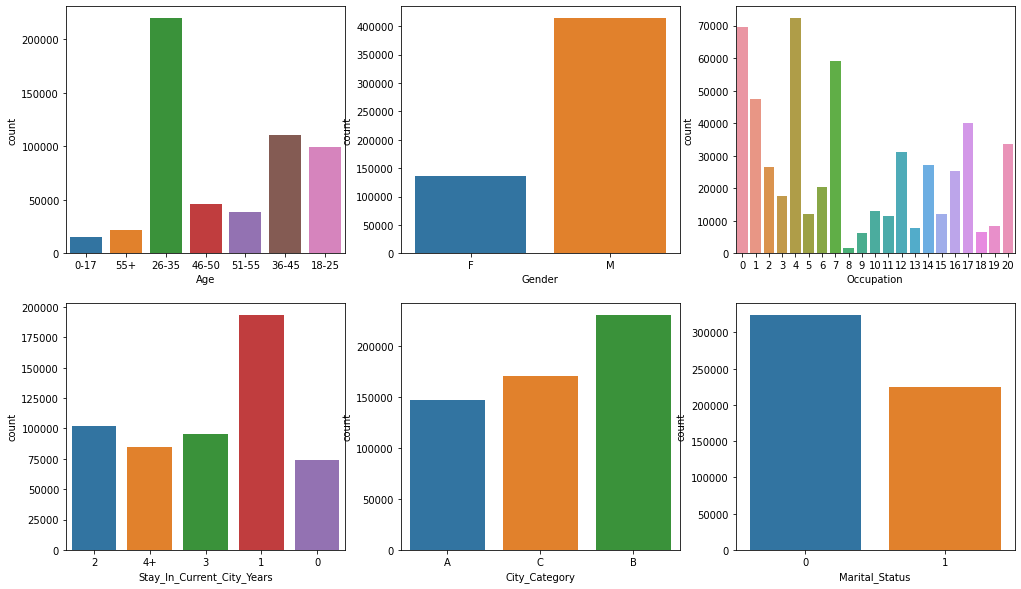

In [79]:
# Creating Count plots for Important categorical fields 
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

sns.countplot(train_df["Age"],ax=axis[0,0])
sns.countplot(train_df["Gender"],ax=axis[0,1])
sns.countplot(train_df["Occupation"],ax=axis[0,2])
sns.countplot(train_df["City_Category"],ax=axis[1,1])
sns.countplot(train_df["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(train_df["Marital_Status"],ax=axis[1,2])

#### From Above Figures we can conclude that,

##### Conclusions :- 
* In figure 1, 26-35 age range have done more transactions.
* In figure 2, Male users have done more transactions.
* In figure 3, Users whose occupations are 1 and 4 have done more transactions.
* In figure 4, Users who stayed in current city for 1 year have done more transactions.
* In figure 5, Users from city category B have done more transactions.
* In figure 6, Users who are not married yet have done more transactions.

## =====================================================================

#### Total Purchasing Amount Paid group by Age, Gender, Occupation, City , Years Stay In current City  and marital status 

##### Questions :- 
1. Which age group have spent more in black friday?
2. Have females spent more than males ?
3. Do users' occupation have any relation on spending money at black friday?
4. Do users who are living in the city more than 1 year have spent more money?
5. Does category of city have any imapact on total purchase amount? 
6. Does marital status is related to the black friday?

<AxesSubplot:xlabel='Marital_Status'>

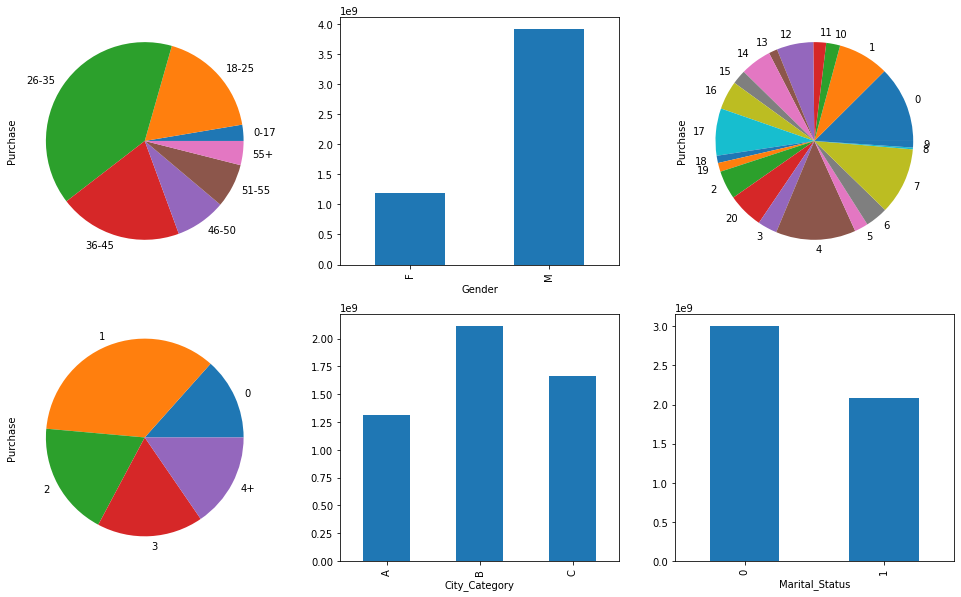

In [119]:
# Creating Count plots for Important categorical fields 

fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

train_df.groupby(["Age"])["Purchase"].sum().plot(kind='pie',ax=axis[0,0])
train_df.groupby(["Gender"])["Purchase"].sum().plot(kind='bar',ax=axis[0,1])
train_df.groupby(["Occupation"])["Purchase"].sum().plot(kind='pie',ax=axis[0,2])
train_df.groupby(["City_Category"])["Purchase"].sum().plot(kind='bar',ax=axis[1,1])
train_df.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().plot(kind='pie',ax=axis[1,0])
train_df.groupby(["Marital_Status"])["Purchase"].sum().plot(kind='bar',ax=axis[1,2])

#### From Above Figures we can conclude that,

##### Conclusions :- 
* In figure 1, 26-35 age range have spent more money.
* In figure 2, Male users have spent more money.
* In figure 3, Users whose occupations are 1 and 4 have spent more money.
* In figure 4, Users who stayed in current city for 1 year have spent more money.
* In figure 5, Users from city category B have spent more money.
* In figure 6, Users who are not married yet have spent more money.

#### Btw the insights look same for both purchase total Count and Amount. So let's chceck out the average Amount

## =====================================================================

#### Let's see Average Purchased Amount by Age, Gender, Occupation, City , Years Stay In current City  and marital status

##### Questions :- 
1. Does average values have different story to tell than with the total values?

<AxesSubplot:xlabel='Marital_Status'>

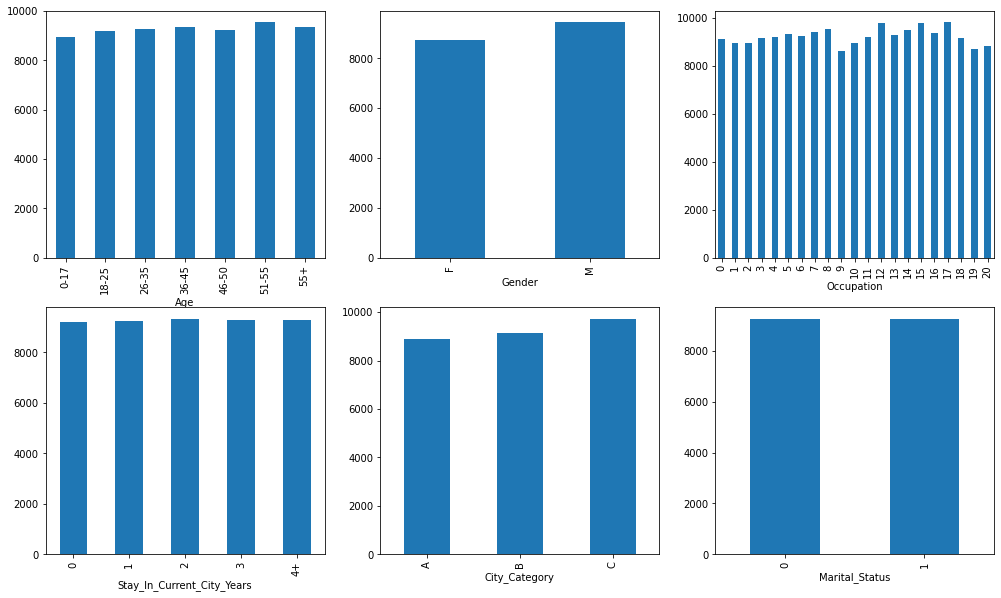

In [81]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

train_df.groupby(["Age"])["Purchase"].mean().plot(kind='bar',ax=axis[0,0])
train_df.groupby(["Gender"])["Purchase"].mean().plot(kind='bar',ax=axis[0,1])
train_df.groupby(["Occupation"])["Purchase"].mean().plot(kind='bar',ax=axis[0,2])
train_df.groupby(["City_Category"])["Purchase"].mean().plot(kind='bar',ax=axis[1,1])
train_df.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().plot(kind='bar',ax=axis[1,0])
train_df.groupby(["Marital_Status"])["Purchase"].mean().plot(kind='bar',ax=axis[1,2])

After seeing above figures, we can conclude that, according to the data , for all the categories of the categorical fields, the average purchased amounts are almost same.

## =====================================================================

#### Let's see the total Purchased Amount by **product_categories** by Age, Gender, Occupation, City, Years Stay In current City  and marital status

##### Questions :-
1. Among 2 categories of the products, which one is valued more than other one?

<AxesSubplot:xlabel='Marital_Status'>

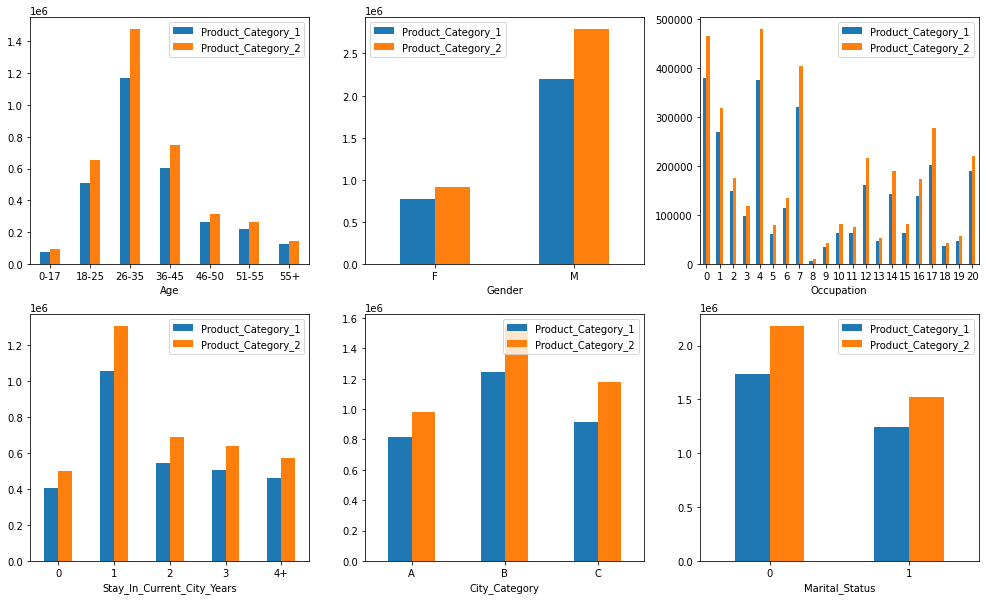

In [82]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

train_df.groupby(["Age"])[["Product_Category_1","Product_Category_2"]].sum().plot(kind='bar',ax=axis[0,0], rot= 0 )
train_df.groupby(["Gender"])[["Product_Category_1","Product_Category_2"]].sum().plot(kind='bar',ax=axis[0,1], rot= 0 )
train_df.groupby(["Occupation"])[["Product_Category_1","Product_Category_2"]].sum().plot(kind='bar',ax=axis[0,2], rot= 0 )
train_df.groupby(["City_Category"])[["Product_Category_1","Product_Category_2"]].sum().plot(kind='bar',ax=axis[1,1], rot= 0 )
train_df.groupby(["Stay_In_Current_City_Years"])[["Product_Category_1","Product_Category_2"]].sum().plot(kind='bar',ax=axis[1,0], rot= 0 )
train_df.groupby(["Marital_Status"])[["Product_Category_1","Product_Category_2"]].sum().plot(kind='bar',ax=axis[1,2], rot= 0 )


Above bar charts represents that, **product_category_2's** total purchased amount is more than **product_category_1's** in every categories of all the categorical fields.

## =====================================================================

####  Let's see the total Purchased Amount by gender by Age,, Occupation, Years Stay In current City  and marital status

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

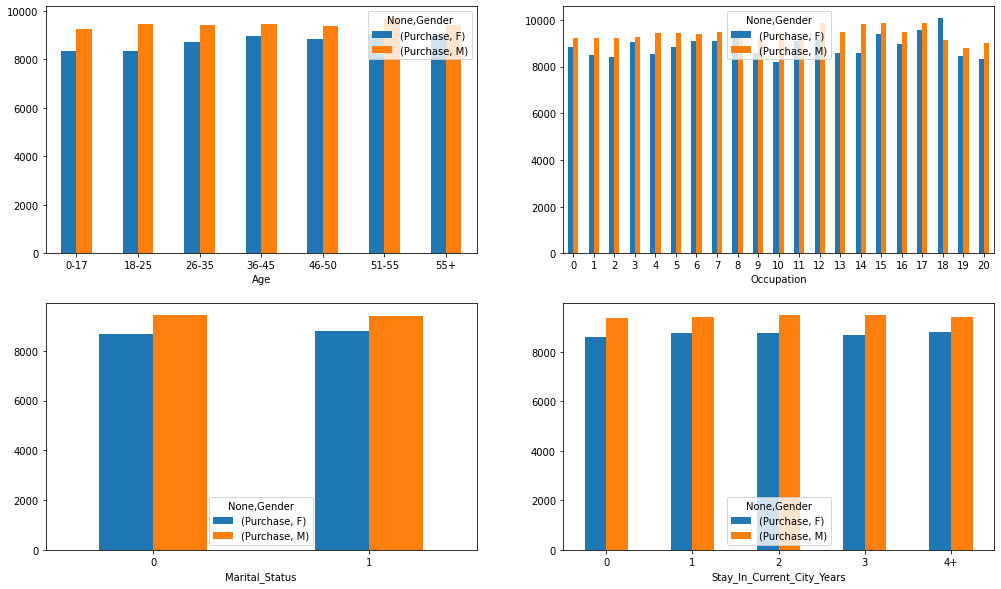

In [83]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(17,10))

train_df.groupby(["Age","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,0])
train_df.groupby(["Occupation","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,1])
train_df.groupby(["Marital_Status","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,0])
train_df.groupby(["Stay_In_Current_City_Years","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,1])

## =====================================================================

#### Let's see Pairplot with all Numeric columns

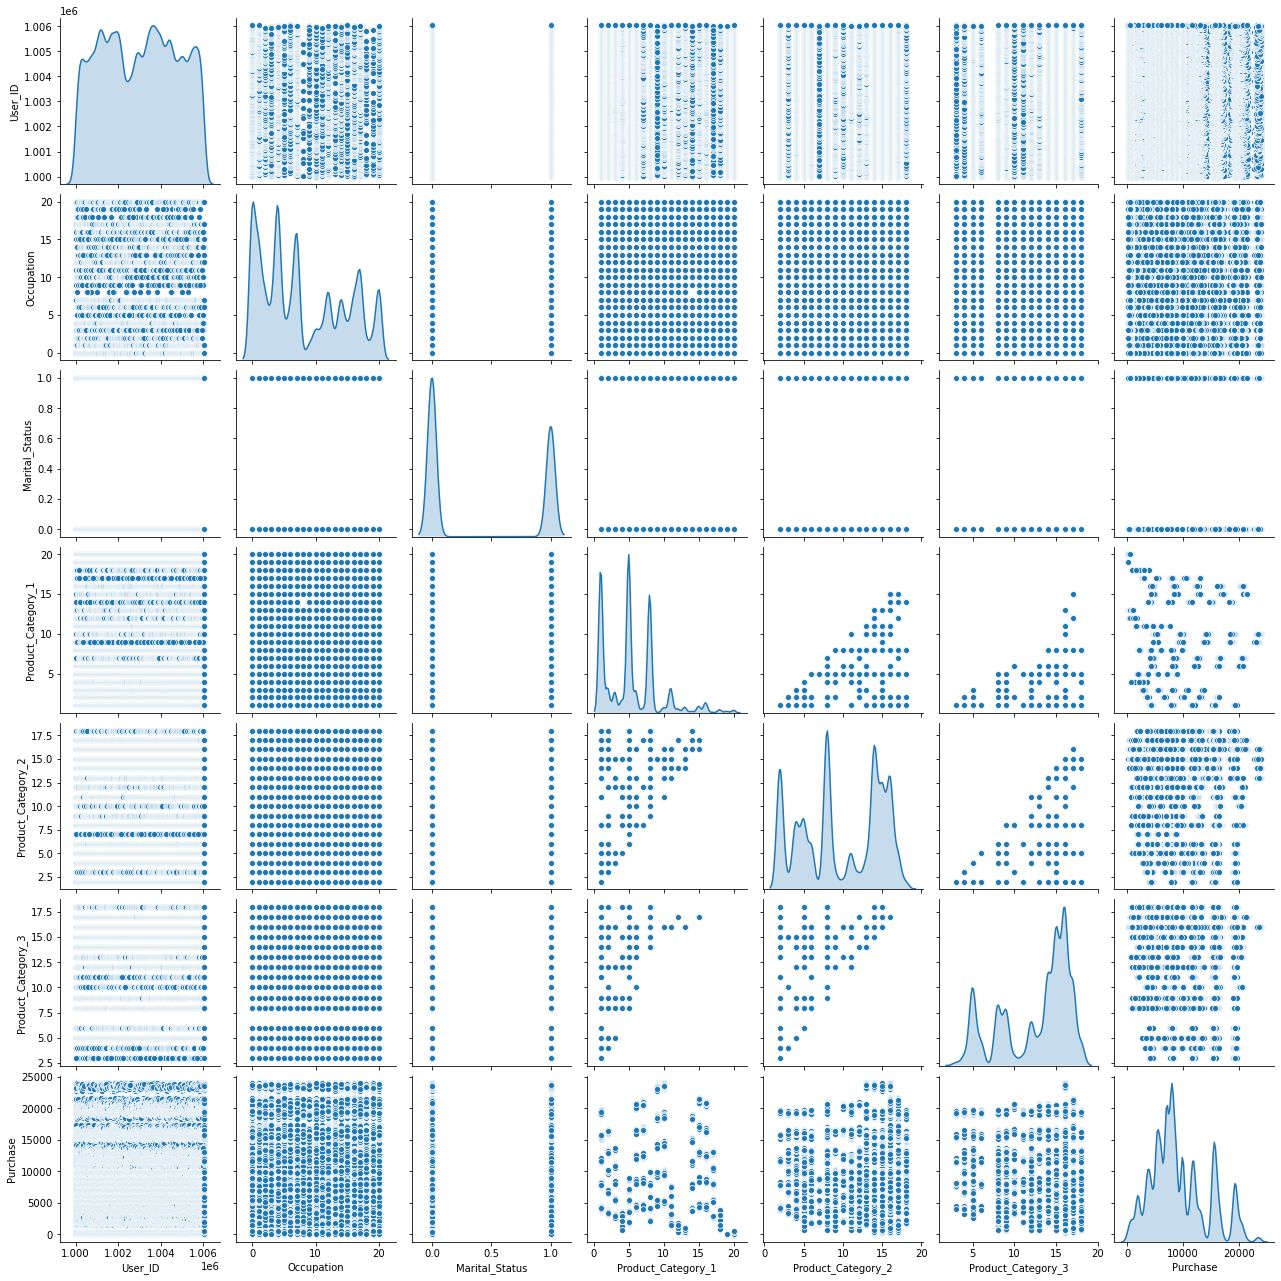

In [10]:
sns.pairplot(train_df,diag_kind="kde" )Marital_Status

* Above Pairplot is not giving more good insights about the correlation between numeric values.
* Also marital status and occupation fields are also being considered as those are in Numeric form.We need to change those fields to categorical type.

## 3. Prepare Data
#### Handle Missing Values 

In [84]:
train_df.isna().sum()*100/train_df.shape[0]

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

We can see in below table that **Product_Category_3** has 69% missing values.
which is extremely high. so, we have to get rid of that column. 
Because it doesn't make sense to put some mean/median value of only 40% values

In [85]:
train_df = train_df.drop("Product_Category_3",axis=1)
print("Dropped the 'Product_Category_3' field")

Dropped the 'Product_Category_3' field


<AxesSubplot:>

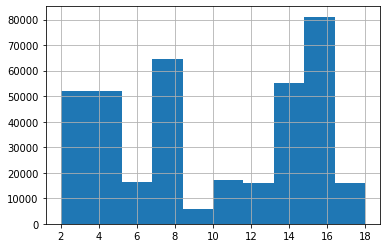

In [86]:
train_df.Product_Category_2.hist()

Common method is to use mean or median values to fill the missing values, but in this scenario we have more than 30% missingng values in the **Product_Category_2** field. If we use the mean or median impute method than the data will become biased.So we have to use different impute strategy.

We can use **KNN Imputer to fill** the missing values

In [87]:
knn_imputer = KNNImputer(n_neighbors=3)
updated_train_df = knn_imputer.fit_transform(train_df[["Product_Category_1","Product_Category_2"]].T).T
train_df["Product_Category_2"] = updated_train_df[:,1]
    

#### Updated Product_Category_2 values

<AxesSubplot:>

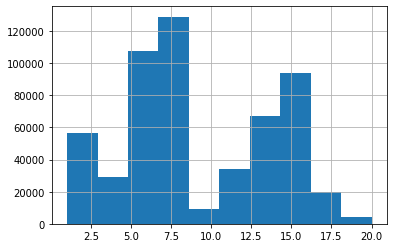

In [88]:
train_df.Product_Category_2.hist()

#### Let's check again 

In [90]:
train_df.isna().sum()*100/train_df.shape[0]

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Purchase                      0.0
dtype: float64

### Data Transformation

#### Now we don't have any Missing values, So we can transform our data and feed into the Machine learning model for training.
* For Transformation :- 
    1. **Categorical Fields** :- We will create dummy values using one hot encoding method , because most of the machine learning models only understands numeric values
    2. **Numeric Fields** :- We will standardize the values based on standard saler , with mean = 0, std = 1
* Get the Independent fields and dependent field into new variables

In [91]:
all_categorical_fields = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
train_df[all_categorical_fields] = train_df[all_categorical_fields].astype('str')

# creating dummy values for categorical fields
updt_train_df = pd.concat([train_df.drop(columns=all_categorical_fields),pd.get_dummies(train_df[all_categorical_fields])],sort=True,axis=1)

# Standardizing the values
updt_train_df[["Product_Category_1","Product_Category_2"]] = stdscaler.fit_transform(updt_train_df[["Product_Category_1","Product_Category_2"]])

# separate dataframes one is for independant fields and another for dependant field (Target Field)
X = updt_train_df.drop(columns=['User_ID', 'Product_ID','Purchase'])
y = updt_train_df['Purchase']

In [92]:
print("Input shape -> {}".format(X.shape))
print("Output shape -> {}".format(y.shape))

Input shape -> (550068, 42)
Output shape -> (550068,)


## 4. Data Modeling
#### Split the Data into train and test data set by 70%-30% 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Input train shape -> {}".format(X_train.shape))
print("Input test shape -> {}".format(X_test.shape))

Input train shape -> (385047, 42)
Input test shape -> (165021, 42)


## 5. Evaluate the Results
####  Train Different Models and evaluate the results

In [109]:
def train_and_evaluate(model,X_train,y_train,X_test,y_test):
    '''
    This function is to fit the machine learning model and evaluate the R2 score for train and test data
    
    INPUT:
    model - Machine Learning model
    X_train - Training data 
    y_train - Training output values
    X_test - Testing data
    y_test - Testing output values
    
    OUTPUT:
    model - Trained Machine Learning  model
    '''
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Score method gives the R2 score actually, so we can directly check the R2 score
    print("Train R-2 Score -> {}".format(r2_score(y_train, y_pred_train)))
    print("Test R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))
    print()
    print("=============================================")
    print()
    print("Train RMSE Score -> {}".format(sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE Score -> {}".format(sqrt(mean_squared_error(y_test,y_pred_test))))
    return model

### 1. Linear Regression

In [110]:
lr = LinearRegression(n_jobs=-1)
train_and_evaluate(lr,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.1334021639778864
Test R-2 Score -> 0.12916773231335787


Train RMSE Score -> 4677.173872007731
Test RMSE Score -> 4684.75767340656


LinearRegression(n_jobs=-1)

### 2. Decision Tree Regressor

In [111]:
dtr = DecisionTreeRegressor(max_depth=8,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)
train_and_evaluate(dtr,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.620705208649921
Test R-2 Score -> 0.6151249212697111


Train RMSE Score -> 3094.305250315925
Test RMSE Score -> 3114.4385769651567


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10, min_samples_leaf=2,
                      min_samples_split=5, random_state=142)

### 3. Random Forest Regressor

In [112]:
rf = RandomForestRegressor(max_depth=8,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=142)
train_and_evaluate(rf,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.6511193199305045
Test R-2 Score -> 0.6434288913727759


Train RMSE Score -> 2967.65338462221
Test RMSE Score -> 2997.7330111356996


RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      random_state=142)

### 4. KNN regressor 

In [113]:
knnreg = KNeighborsRegressor(n_neighbors = 6)
train_and_evaluate(knnreg,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.5919137051272637
Test R-2 Score -> 0.47115338515263727


Train RMSE Score -> 3209.5985835083516
Test RMSE Score -> 3650.772236540484


KNeighborsRegressor(n_neighbors=6)

### 5. XGBoost Regressor

In [118]:
# Various hyper-parameters to tune
xgbr = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

fitted_xgb = train_and_evaluate(xgb_grid,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.6829222397263268
Test R-2 Score -> 0.6652795262248081


Train RMSE Score -> 2829.1606288653716
Test RMSE Score -> 2904.430665954336


In [26]:
print(fitted_xgb.best_score_)
print(fitted_xgb.best_params_)

0.669069283801679
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


## 6. Deploy 
#### In this notebook the meaning of deployment is to save the best model in pickle format and then using that saved pickle we can load this model in to the API service which will be deployed in the cloud plateform. This API then will be used to predict the purchase amount of individual customer for black friday.

In [30]:
# Save the model to file in the current working directory

Pkl_Filename = "BlackFriday_XGB_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(fitted_xgb, file)

# Thanks